# Analiza hribov in poti v Sloveniji
### Projektna naloga pri predmetu Uvod v programiranje

Najprej sem uvozil knjižnico __Pandas__, s katero sem opravil analizo podatkov. Uvozim in preberem csv datoteki s shranjenimi
hribi `hribiAnaliza.csv` in potmi `potiAnaliza.csv` s spletnega portala __[hribi.net](https://WWW.hribi.net)__. Podatke za analizo sem zbral s spletnih strani in shranil v format csv s pomočjo skripte `izlušči_imena_hribov.py`. Za risanje nekaterih grafov sem uporabil tudi knjižnico __matplotlib.pyplot__.
***
Shranil sem naslednje podatke:
* Podatki o hribih:
    - ime hriba,
    - gorovje v katerem leži hrib,
    - nadmorska višina hriba,
    - vrsta cilja (npr. koča, vrh ...)
    - število poti, ki vodijo na posamezni hrib.<br>
* Podatki o vsaki poti na hrib:
    - ime hriba na katerega vodi pot, 
    - višinska razlika po poti,
    - zahtevnost poti,
    - predviden čas hoje.


Z analizo podatkov bom poskušal odgovoriti na vprašanja oziroma potrditi naslednje hipoteze, ki sem si jih postavil preden <br>sem pričel delati pojektno nalogo ali pa sem se jih spomnil med iskanjem idej kam se bi odpravil v hribe, ko zaključim z nalogo.

1. V katerem gorovju imajo hribi v povprečju največ poti?
2. Višji hribi imajo zahtevnejše poti.
3. Če je na cilju koča, do cilja vodi več poti, kot do cilja brez koče.
4. V Julijskih alpah je največ zahtevnejših poti.
5. Na hribe s povprečno manjšo zahtevnostjo poti vodi več poti.
6. Koliko višinskih metrov se v povprečju prehodi v eni minuti?
7. Pot z večjo višinsko razliko je v povprečju težja.


In [1026]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20

hribi = pd.read_csv('hribiAnaliza.csv', delimiter=';', index_col='Ime')
poti = pd.read_csv('potiAnaliza.csv', delimiter=';', index_col='Ime')

In [1024]:
hribi

,Gorovje,Višina,Število_poti,Vrsta_cilja
Ime,,,,
Ahac,"Goriško, Notranjsko in Snežniško hribovje",799,6,"'vrh', 'cerkev'"
Ajdovščina,"Goriško, Notranjsko in Snežniško hribovje",804,1,'vrh'
Ankaran,"Goriško, Notranjsko in Snežniško hribovje",18,3,''
Baba (pri Javornikih),"Goriško, Notranjsko in Snežniško hribovje",1085,2,'vrh'
Bela stena,"Goriško, Notranjsko in Snežniško hribovje",1122,1,'vrh'
...,...,...,...,...
Zeleno okno,"Strojna, Košenjak, Kozjak in Slovenske gorice",325,3,'vrh'
Župank,"Strojna, Košenjak, Kozjak in Slovenske gorice",508,1,''
Župank,"Strojna, Košenjak, Kozjak in Slovenske gorice",508,1,''


In [969]:
poti

,Višinska_razlika,Zahtevnost,Čas
Ime,,,
Ahac,189,lahka označena pot,40
Ahac,300,lahka označena pot,120
Ahac,379,lahka neoznačena steza,60
Ahac,377,lahka neoznačena steza,60
Ahac,175,lahka označena pot,60
...,...,...,...
Zavrh v Slovenskih goricah,150,lahka označena pot,80
Zeleno okno,120,lahka označena pot,50
Zeleno okno,170,lahka označena pot,115


***

## **1.** *V katerem gorovju imajo hribi v povprečju največ poti?*

Najprej sem hribe pogrupiral glede na gorovje ter nato seštel število poti v vsakem gorovju. Rezultati so prikazani s stolpičnim diagramom. Največ poti je v *Julijskih Alpah*. <br>Nato me je zanimalo ali je v *Julijskih Alpah* tako veliko hribov, da število vseh poti nanje premaga ostala gorovja. Zato sem na naslednjem (rumeno - zelenem) grafu prikazal povprečno število poti na hrib v posameznem gorovju. Ugotovil sem, da je povprečno največ poti na hrib v *Škofjeloškem, Cerkljanskem hribovju in Jelovici*, sledijo *Kamniško Savinjske Alpe*, medtem ko so *Julijske Alpe* šele na sedmem mestu od vseh desetih gorovji v Sloveniji. 

In [970]:
hribi_po_gorovju = hribi.groupby('Gorovje')

<Axes: xlabel='Gorovje', ylabel='Število poti v gorovju'>

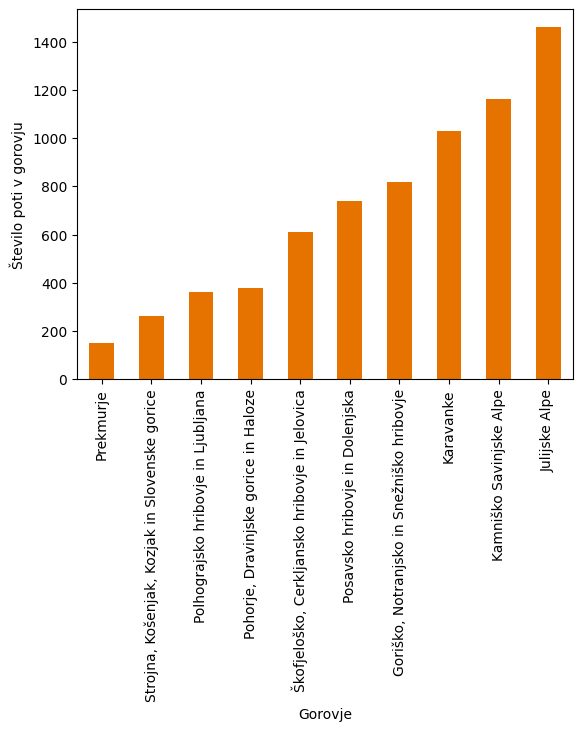

In [1007]:
hribi_po_gorovju.Število_poti.sum().sort_values().plot.bar(ylabel='Število poti v gorovju', color='#e67300')

<Axes: xlabel='Gorovje', ylabel='Povprečno število poti na hrib'>

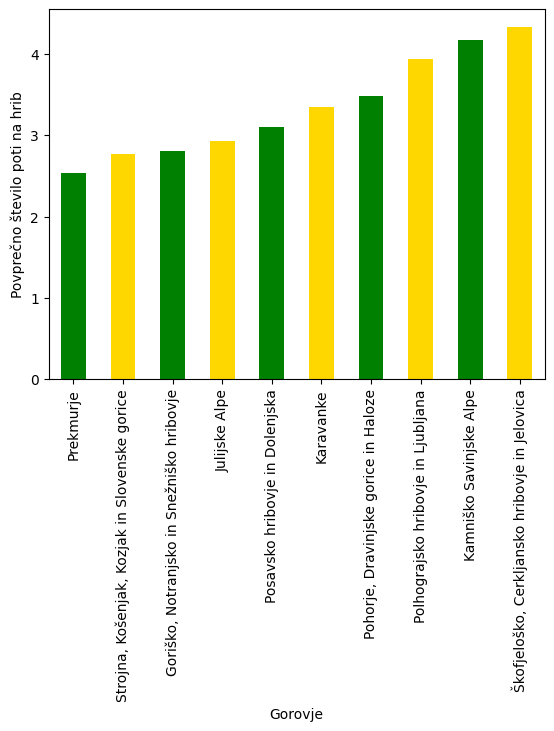

In [1013]:
hribi_po_gorovju.Število_poti.mean().sort_values().plot.bar(ylabel='Povprečno število poti na hrib', color=['green', '#FFD700'])

***

## **2.** *Višji hribi imajo zahtevnejše poti.*

Za analizo zahtevnosti sem vpeljal pet številčnih ocen in opisne ocene zahtevnosti uvrstil vanje:
<div class="alert alert-block alert-info">
1 lahka označena pot, lahka neoznačena steza<br>
2 delno zahtevna označena pot, delno zahtevna neoznačena pot,
lahko brezpotje<br>
3 zahtevna označena pot, zahtevna neoznačena steza, 
zahtevno brezpotje<br>
4 zelo zahtevna označena pot, zelo zahtevna neoznačena steza, 
zelo zahtevno brezpotje<br>
5 izjemno zahtevna označena pot, alpinistični vzpon.<br></div>

Pri nekaterih poteh se pojavi kombinacija dveh opisov zahtevnosti, zato sem s funkcijo `zahtevnosti` poiskal vse kombinacije in jih nato uvrstil v najvišjo oceno glede na ocene iz katerih je kombinacija sestavljena (npr. opisu zahtevnosti _lahka neoznačena steza, zelo zahtevna označena pot_ sem priredil oceno 4).


In [973]:
# Poiščemo vse možne zahtevnosti
def zahtevnosti(datoteka):
    zahtevnostiSez = []
    with open (datoteka, 'r', encoding='utf-8') as dat:
        vrste = [vrsta.strip() for vrsta in dat]
        for vrsta in vrste:
            if vrste.index(vrsta) == 0:
                continue
            else:
                ime, visinska, zahtevnost, cas = vrsta.split(';')
                zahtevnostiSez.append(zahtevnost)
    zahtevnosti = set(zahtevnostiSez)
    return zahtevnosti
vse_zahtevnosti = zahtevnosti('potiMin.csv')
print(vse_zahtevnosti)


{'zelo zahtevna označena pot, zahtevno brezpotje', 'zahtevno brezpotje, zahtevna označena pot', 'delno zahtevna označena pot, delno zahtevna neoznačena pot', 'zahtevno brezpotje', 'zelo zahtevna označena pot, lahko brezpotje', 'lahka neoznačena steza, zahtevno brezpotje', 'lahka označena pot, lahka neoznačena steza', 'lahka neoznačena steza, lahka označena pot', 'zelo zahtevna označena pot, zahtevna neoznačena steza', 'delno zahtevna označena pot, lahko brezpotje', 'zahtevna označena pot, delno zahtevna neoznačena pot', 'lahka neoznačena steza, zahtevna označena pot', 'lahka označena pot, zahtevna označena pot', 'lahko brezpotje, zahtevna označena pot', 'lahko brezpotje, delno zahtevna označena pot', 'zelo zahtevna neoznačena steza', 'zahtevna označena pot', 'alpinistični vzpon', 'zahtevna neoznačena steza', 'zahtevna neoznačena steza, zahtevna označena pot', 'delno zahtevna neoznačena pot, lahka označena pot', 'zahtevna neoznačena steza, lahko brezpotje', 'lahka označena pot, delno za

In [1021]:

poti_zahtevnost = poti.Zahtevnost.replace(
    ['lahka označena pot','lahka neoznačena steza', 
'lahka označena pot, lahka neoznačena steza', 'lahka neoznačena steza, lahka označena pot', 
'lahka označena pot, lahka označena pot'], 1).replace(
    ['delno zahtevna označena pot', 'delno zahtevna neoznačena pot', 
'lahko brezpotje', 'lahka označena pot, lahko brezpotje', 
'lahko brezpotje, lahka označena pot', 'delno zahtevna označena pot, lahka neoznačena steza', 
'delno zahtevna neoznačena pot, lahka označena pot', 'delno zahtevna označena pot, delno zahtevna neoznačena pot', 
'delno zahtevna označena pot, lahko brezpotje', 'lahko brezpotje, delno zahtevna označena pot', 
'lahka označena pot, delno zahtevna neoznačena pot', 'lahko brezpotje, lahka neoznačena steza', 
'delno zahtevna neoznačena pot, lahko brezpotje', 'lahka označena pot, delno zahtevna označena pot', 
'delno zahtevna neoznačena pot, delno zahtevna označena pot', 'lahka neoznačena steza, delno zahtevna označena pot', 
'lahka neoznačena steza, delno zahtevna neoznačena pot','lahka neoznačena steza, lahko brezpotje'], 2).replace(
    ['zahtevna označena pot', 'zahtevna neoznačena steza', 
'zahtevno brezpotje', 'zahtevno brezpotje, zahtevna označena pot', 
'lahka neoznačena steza, zahtevno brezpotje', 'zahtevna označena pot, delno zahtevna neoznačena pot', 
'lahka neoznačena steza, zahtevna označena pot', 'lahka označena pot, zahtevna označena pot', 
'lahko brezpotje, zahtevna označena pot', 'zahtevna neoznačena steza, lahko brezpotje', 
'zahtevna označena pot, lahka neoznačena steza', 'delno zahtevna označena pot, zahtevno brezpotje', 
'lahka označena pot, zahtevno brezpotje', 'zahtevna označena pot, lahko brezpotje', 
'delno zahtevna neoznačena pot, zahtevna označena pot', 'zahtevna označena pot, zahtevno brezpotje',
'zahtevna neoznačena steza, lahka označena pot', 'zahtevno brezpotje, zahtevna neoznačena steza', 
'zahtevna neoznačena steza, zahtevna označena pot'], 3).replace(
    ['zelo zahtevna označena pot', 'zelo zahtevna neoznačena steza', 
'zelo zahtevno brezpotje', 'zelo zahtevna označena pot, zahtevno brezpotje', 
'zelo zahtevna označena pot, lahko brezpotje', 'zelo zahtevna označena pot, zahtevna neoznačena steza', 
'zelo zahtevna označena pot, delno zahtevna neoznačena pot', 'lahka neoznačena steza, zelo zahtevna označena pot', 
'delno zahtevna označena pot, zelo zahtevno brezpotje', 'zahtevno brezpotje, zelo zahtevna označena pot', 
'lahko brezpotje, zelo zahtevna označena pot', 'zelo zahtevna neoznačena steza, lahko brezpotje', 
'zelo zahtevna označena pot, lahka neoznačena steza', 'zelo zahtevna označena pot, zelo zahtevno brezpotje', 
'zelo zahtevna neoznačena steza, zahtevna označena pot'], 4).replace(
    ['izjemno zahtevna označena pot', 'alpinistični vzpon', 
'izjemno zahtevna označena pot, lahko brezpotje'], 5).replace('ni podatka', pd.NA).reset_index()

poti_na_hrib = poti_zahtevnost.groupby('Ime').mean()
poti_na_hrib.sort_values('Zahtevnost').tail(15)

,Zahtevnost
Ime,
Jezerska Kočna,4.142857
Dolgi hrbet,4.166667
Škrlatica,4.2
Veliki Oltar,4.5
Soteska Mučevo,4.5
Na Križu (Kokrska Kočna),5.0
Rigljica,5.0
Brunarica Krmiše,5.0
Spodnji Rokav,5.0


Iz radovednosti sem hribe razvrstil glede na povprečno zahtevnost poti in ugotovil, da na devet hribov vodijo le poti z oceno 5, to so:
+ Na Križu (Kokrska Kočna)
+ Rigljica	
+ Brunarica Krmiše
+ Spodnji Rokav	
+ Kamin Široka polica	
+ Vevnica	
+ Strug	
+ Jerman	
+ Ožarjeni kamen. 
<br>

    <u>Opomba:</u> Ko sem prebral opise teh najzahtevnejših hribov, sem ugotovil, da jih nekaj med njimi ni ravno hrib ampak so le ime za     ferato, ki poteka v bližini. Tako je Ožarjeni kamen ime ferate, Jerman je potok, Kamin Široka polica in Brunarica krmiše pa sta kot že ime     pove tvorba v skali in brunarica.


In [1018]:
skupaj_zahtevnost = pd.merge(poti_na_hrib, hribi, left_on='Ime', right_on='Ime')
skupaj_zahtevnost

,Zahtevnost,Gorovje,Višina,Število_poti,Vrsta_cilja
Ime,,,,,
Ablanca,3.0,Julijske Alpe,2004,9,'vrh'
Adam,2.0,Julijske Alpe,2012,1,'vrh'
Adijev bivak na Reški planini,1.0,Posavsko hribovje in Dolenjska,910,1,'bivak'
Ahac,1.0,"Goriško, Notranjsko in Snežniško hribovje",799,6,"'vrh', 'cerkev'"
Ajdna,1.857143,Karavanke,1046,7,'vrh'
...,...,...,...,...,...
Župank,1.0,"Strojna, Košenjak, Kozjak in Slovenske gorice",508,1,''
Župank,1.0,"Strojna, Košenjak, Kozjak in Slovenske gorice",508,1,''
Županov vrh,1.0,"Goriško, Notranjsko in Snežniško hribovje",999,6,'vrh'


Za potrditev hipoteze, da na višje hribe vodijo zahtevnejše poti sem izračunal Pearsonov korelacijski koeficient med spremenljivkama višina hriba in poprečno zahtevnostjo poti, ki vodijo nanj. Izračunana vrednost 0,59 nakazuje na srednjo povezanost višine in zahtevnosti. "Preko palca" lahko hipotezo potrdimo. <br>
Razporeditev zahtevnosti poti glede na višino hriba sem prikazal tudi na spodnjem "raztresenem" grafu.

,Višina,Zahtevnost
Višina,1.000000,0.590234
Zahtevnost,0.590234,1.000000


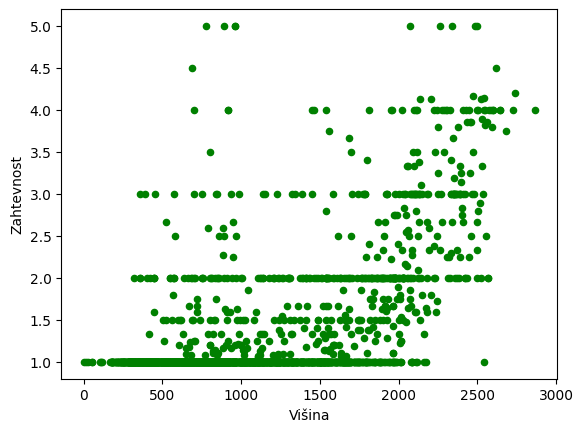

In [976]:
skupaj_zahtevnost.plot.scatter('Višina', 'Zahtevnost', color='green')
skupaj_zahtevnost_korelacija = skupaj_zahtevnost[['Višina', 'Zahtevnost']]
skupaj_zahtevnost_korelacija.corr(method='pearson')

***

## **3.** *Če je na cilju koča, do cilja vodi več poti, kot do cilja brez koče.*

Za preverjanje tretje hipoteze sem najprej prefiltriral cilje glede na to ali je na njih koča `cilji_koce` ali je ni `cilji_ni_koce`. Opazim, da 1784 ciljev na vrhu nima koče in le na 323 ciljih stoji tudi koča.<br>
Rezultat analize sem predstavil s škatlo z brki.

In [1022]:
cilji_koce = hribi.loc[hribi['Vrsta_cilja'].str.contains('koča')]
cilji_ni_koce = hribi.loc[~hribi['Vrsta_cilja'].str.contains('koča')].replace('', pd.NA)
cilji_koce

,Gorovje,Višina,Število_poti,Vrsta_cilja
Ime,,,,
Bloško jezero,"Goriško, Notranjsko in Snežniško hribovje",748,4,"'koča', 'jezero'"
Dom na Goropekah,"Goriško, Notranjsko in Snežniško hribovje",742,2,'koča'
Dom na Sabotinu,"Goriško, Notranjsko in Snežniško hribovje",560,2,'koča'
Dom na Slivnici,"Goriško, Notranjsko in Snežniško hribovje",1078,2,'koča'
Dom na Sviščakih,"Goriško, Notranjsko in Snežniško hribovje",1242,1,'koča'
...,...,...,...,...
Sveti Duh (Stara Gora),"Strojna, Košenjak, Kozjak in Slovenske gorice",262,2,"'vrh', 'koča', 'cerkev'"
Trojiško jezero (Gradiško jezero),"Strojna, Košenjak, Kozjak in Slovenske gorice",234,1,"'koča', 'jezero'"
Turistična kmetija Amur,"Strojna, Košenjak, Kozjak in Slovenske gorice",260,2,"'koča', 'jezero'"


<function matplotlib.pyplot.show(close=None, block=None)>

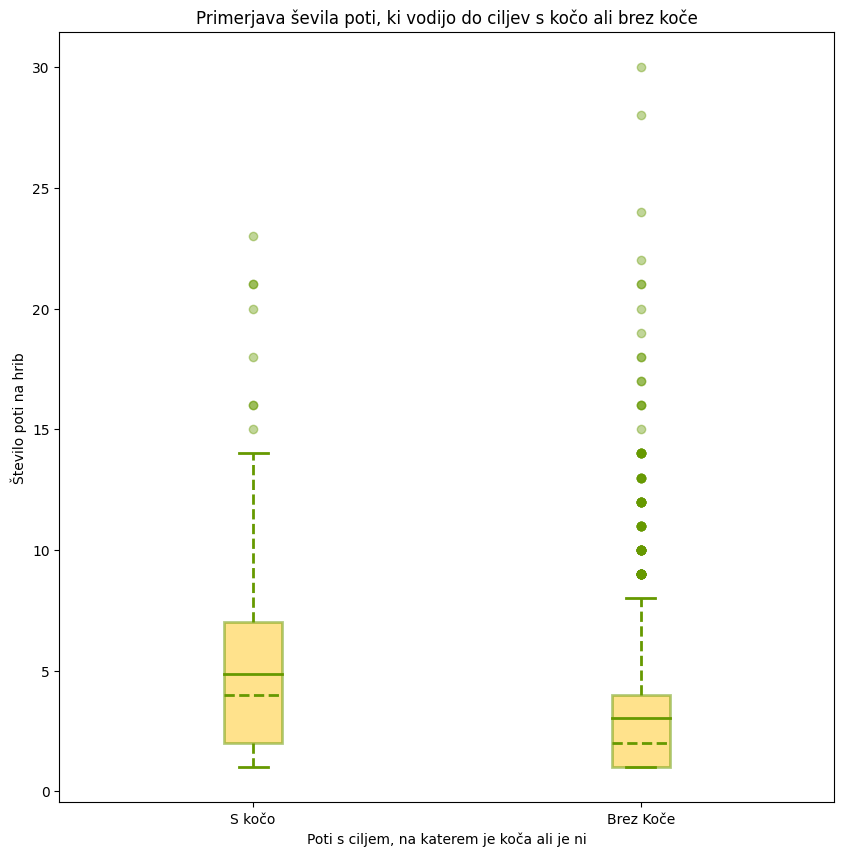

In [981]:
figure = plt.figure(1, figsize=(10,10))
fig = figure.add_subplot(111)
fig.set_ylabel('Število poti na hrib')
fig.set_xlabel('Poti s ciljem, na katerem je koča ali je ni')
fig.set_title('Primerjava ševila poti, ki vodijo do ciljev s kočo ali brez koče')
bp_cilji = plt.boxplot([cilji_koce['Število_poti'], cilji_ni_koce['Število_poti']], patch_artist=True, sym='#669900', meanline=True, showmeans=True, labels=['S kočo', 'Brez Koče'])
for box in bp_cilji['boxes']:
    box.set(color='#669900', linewidth=2)
    box.set(facecolor='#ffc61a', alpha=0.5)

for whisker in bp_cilji['whiskers']:
    whisker.set(color='#669900', linewidth=2, linestyle='dashed')

for cap in bp_cilji['caps']:
    cap.set(color='#669900', linewidth=2)

for median in bp_cilji['medians']:
    median.set(color='#669900', linestyle='dashed', linewidth=2, marker='', markersize=7)

for mean in bp_cilji['means']:
    mean.set(color='#669900', linestyle='solid', linewidth=2)

for flier in bp_cilji['fliers']:
    flier.set(marker='o', color= '#669900', alpha=0.4)
plt.show

Na prikazu s škatlo z brki polna črta v škatli predstavlja povprečje skupine podatkov, črtkana pa mediano podatkov. Opazimo, da imajo hribi s kočo na vrhu več poti kot hribi brez koče. Da sem se prepričal in si boljse predstavljal razliko sem izračunal še povprečji, ki za cilje s kočo znaša **4,9**, za cilje brez koče pa **3,0**. S tem sem hipotezo potrdil. Možno je da je rezultat posledica tega, da se koče dostikrat nahajajo na lažje dostopnih mestih in zato do njih vodi več poti, ali pa je koča vozlišče več poti. 

In [982]:
cilji_koce.Število_poti.mean()

4.879256965944273

In [983]:
cilji_ni_koce.Število_poti.mean()

3.0252242152466366

***

## **4.** *V Julijskih alpah je največ zahtevnejših poti.*

Da bi preveril četrto hipotezo sem pripravil naloženi stolpični diagram, kjer vsak stolpec predstavlja posamezno gorovje. 
Sprva sem iz podatkov odstranil najnižjo zahtevnost poti (1), saj me zanimajo le zahtevnejše. Nato sem preštel koliko poti posamezne zahtevnosti je v vsakem gorovju, rezultati so predstavjeni v tabeli. 

,Zahtevnost,Število zahtevnih 2,Zahtevnost,Število zahtevnih 3,Zahtevnost,Število zahtevnih 4,Zahtevnost,Število zahtevnih 5
Gorovje,,,,,,,,
"Goriško, Notranjsko in Snežniško hribovje",2,33,3.0,7.0,4.0,5.0,NaN,NaN
Julijske Alpe,2,292,3.0,246.0,4.0,159.0,5.0,12.0
Kamniško Savinjske Alpe,2,126,3.0,112.0,4.0,112.0,5.0,12.0
Karavanke,2,142,3.0,83.0,4.0,41.0,5.0,15.0
"Pohorje, Dravinjske gorice in Haloze",2,6,3.0,9.0,NaN,NaN,NaN,NaN
Polhograjsko hribovje in Ljubljana,2,14,NaN,NaN,4.0,2.0,NaN,NaN
Posavsko hribovje in Dolenjska,2,29,3.0,12.0,4.0,2.0,5.0,1.0
"Strojna, Košenjak, Kozjak in Slovenske gorice",2,6,NaN,NaN,NaN,NaN,NaN,NaN
"Škofjeloško, Cerkljansko hribovje in Jelovica",2,28,3.0,3.0,4.0,4.0,NaN,NaN


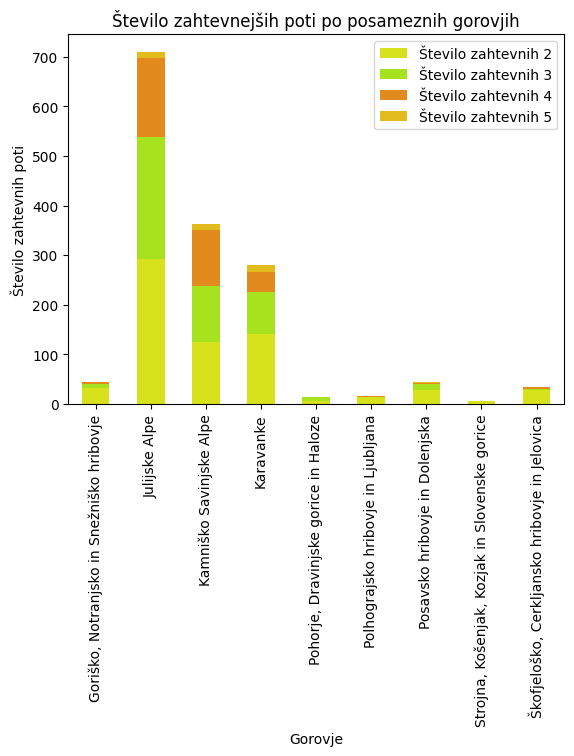

In [1023]:
Združeno = pzSkupaj[pzSkupaj['Zahtevnost'] > 1].groupby(['Gorovje', 'Zahtevnost']).size().to_frame('Št_zahtevnih').reset_index()
Združeno
df2 = Združeno[Združeno['Zahtevnost'] == 2].set_index('Gorovje').rename(columns={'Št_zahtevnih' : 'Število zahtevnih 2'})
df3 = Združeno[Združeno['Zahtevnost'] == 3].set_index('Gorovje').rename(columns={'Št_zahtevnih' : 'Število zahtevnih 3'})
df4 = Združeno[Združeno['Zahtevnost'] == 4].set_index('Gorovje').rename(columns={'Št_zahtevnih' : 'Število zahtevnih 4'})
df5 = Združeno[Združeno['Zahtevnost'] == 5].set_index('Gorovje').rename(columns={'Št_zahtevnih' : 'Število zahtevnih 5'})
poZahtevnosti = pd.concat([df2, df3, df4, df5], axis=1)

poZahtevnosti.groupby(level=0, axis=1).sum().plot.bar(y=['Število zahtevnih 2', 'Število zahtevnih 3', 'Število zahtevnih 4', 
'Število zahtevnih 5'], stacked=True, ylabel='Število zahtevnih poti', title='Število zahtevnejših poti po posameznih gorovjih', 
color={'Število zahtevnih 2' : '#D7E21D', 'Število zahtevnih 3' : '#A6E21D', 'Število zahtevnih 4' : '#E28A1D', 
'Število zahtevnih 5' : '#E2BC1D'})
poZahtevnosti


Na grafu se opazi, da je število poti z oceno več ali enako 2 največ v Julijskih Alpah, prav tako je tam največ poti če primerjamo vsako posamezno zahtevnost od 2 do 4. Pri najzahtevnejših poteh (ocena 5) pa iz tabele preberemo, da jih je največ (15) v Karavankah, sledita pa Julijske Alpe in Kamniško Savinjske Alpe z 12 najtežjimi potmi. Hipotezo sem delno potrdil, saj je resnično najtežjih poti v Julijskih Alpah manj kot v Karavankah.

***

## **5.** *Na hribe s povprečno manjšo zahtevnostjo poti vodi več poti.*

Za preverjanje pete hipoteze sem izračunal Pearsonov korelacijski koeficient med povprečno zahtevnostjo poti na hrib in številom poti, ki vodijo nanj. Izračunana vrednost je 0,07. Hipoteze nisem potrdil, saj vrednost koeficienta nakazuje na minimalno oziroma skoraj nično povezanost. <br>Rezultat me je presenetil, saj sem pričakoval, da bo na hribe, ki so lažje dostopni vodilo več različnih poti, saj lahko tam nova pot nastane brez posebnega truda (npr. pritrjanja jeklenic), pričakoval bi tudi, da je na lažje dostopnih hribih skozi vse leto več obiskovalcev in bi zato tam naredili več poti.

In [985]:
hrib_zaht = poti_zahtevnost.groupby('Ime').mean()
hrib_zp = hrib_zaht.join(hribi['Število_poti'])
hrib_zp.corr(method='pearson')


,Zahtevnost,Število_poti
Zahtevnost,1.000000,0.067901
Število_poti,0.067901,1.000000


***

## **6.** *Koliko višinskih metrov se v povprečju prehodi v eni minuti?*

Izračunal sem koliko višinskih metrov v povprečju premagamo v eni minuti, če pot prehodimo v času, ki je zapisan ob opisu poti. Poti sem razdelil še po težavnosti, saj sem predpostavljal, da na zahtevnejših poteh prehodimo več višinskih metrov v krajšem času. <br>
Izkazalo se je, da se v povprečju hitrost vzpenjanja ne razlikuje bistveno med različnimi zahtevnostmi poti. Pri vseh zahtevnostih se hitrost vzpenjanja giblje med 4 in 5 m/min. 

In [993]:
potiz = poti['Višinska_razlika'].to_frame('Višinska_razlika').reset_index()
potiv = poti_zahtevnost.join(potiz['Višinska_razlika'].to_frame('Višinska_razlika')).set_index('Ime')
potiv.rename(columns= {'Zahtevnost' : 'Zahtevnost_poti'}, inplace = True)

višinskaM = potiv.groupby('Zahtevnost_poti').Višinska_razlika.mean() 
časM = pd.concat([potiv, poti], axis=1).groupby('Zahtevnost_poti').Čas.mean()

metri_na_min = višinskaM / časM
metri = metri_na_min.to_frame('m/min')

metri

,m/min
Zahtevnost_poti,
1,4.510511
2,4.774981
3,4.836387
4,4.817116
5,4.383776


***

## **7.** *Pot z večjo višinsko razliko je v povprečju zahtevnejša.*

Za konec sem primerjal še povprečno višinsko razliko med potmi z različnimi zahtevnostmi. Tu se je hipoteza delno potrdila, saj je višinska razlika za vsako naslednjo zahtevnost višja. Le pri najtežjih poteh z oceno 5 je višinska razlika nižja od višinske razlike poti z oceno 4. To je verjetno posledica tega, da je v oceni težavnosti 5 združenih tudi nekaj ferat in alpinističnih vzponov, ki so tehnično najzatevnejši, pa ne nujno zelo visoki.

In [1002]:
potiv.sort_values('Višinska_razlika').tail(30)
potiv.groupby('Zahtevnost_poti').mean()

,Višinska_razlika
Zahtevnost_poti,
1,495.317358
2,918.479576
3,1113.549894
4,1398.455108
5,1155.125000


***

## Zaključek

V analizi, ki sem jo opravil sem analiziral **2107 hribov** in **6907 poti**, ki vodijo nanje. Najbolj zanimiv rezultat, ki sem ga z analizo odkril je bilo število višinskih metrov, ki jih v povprečju opravimo v eni minuti vzpenjanja. V nasprotju z mojimi pričakovanji pa je bil rezultat o povprečnem številu poti na hrib, kjer je Julijske Alpe prehitela večina slovenskih gorovji.